In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [29]:
df  = pd.read_csv("/content/gdrive/MyDrive/Fish.csv")
df.head(158)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
153,Smelt,9.8,11.4,12.0,13.2,2.2044,1.1484
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558


In [30]:
pd.DataFrame.sample?

In [31]:
df = df.sample(frac=1).reset_index(drop=True)

In [32]:
y = df["Weight"]
x = df.drop(columns = ["Weight","Species","Length3"])
k = df["Species"]
x.head()

,Length1,Length2,Height,Width
0,32.7,35.0,5.9364,4.3844
1,32.0,34.5,10.2565,6.3875
2,43.2,46.0,7.7920,4.8700
3,34.5,37.0,10.8350,6.2646
4,29.5,31.7,9.4850,5.3550


In [33]:
y.head()

0    300.0
1    556.0
2    567.0
3    700.0
4    390.0
Name: Weight, dtype: float64

In [34]:
x.shape

(159, 4)

In [35]:

u  = np.mean(x, axis = 0 )
std = np.std(x, axis = 0)
print(u,std)

Length1    26.247170
Length2    28.415723
Height      8.970994
Width       4.417486
dtype: float64 Length1     9.964956
Length2    10.682576
Height      4.272708
Width       1.680494
dtype: float64


In [36]:
x = (x-u)/std
x.head()
x["Species"] = k
x = pd.get_dummies(x,columns = ["Species"])
x.head()

,Length1,Length2,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,0.647552,0.616357,-0.710227,-0.019688,0,0,0,1,0,0,0
1,0.577306,0.569551,0.300865,1.172283,0,0,1,0,0,0,0
2,1.701245,1.646071,-0.275936,0.269275,0,0,0,1,0,0,0
3,0.828185,0.803577,0.436259,1.099150,0,0,1,0,0,0,0
4,0.326427,0.307442,0.120300,0.557880,0,0,0,0,1,0,0


In [191]:
"""x_tr = x[:135]
y_tr = y[:135]
x_test = x[135:]
y_test = y[135:]"""
x_tr, x_test, y_tr, y_test = train_test_split(x,y,test_size = 0.15 , random_state = 4)
print(x_tr.shape, y_tr.shape,x_test.shape,y_test.shape)

(135, 11) (135,) (24, 11) (24,)


<Axes: xlabel='Width', ylabel='Weight'>

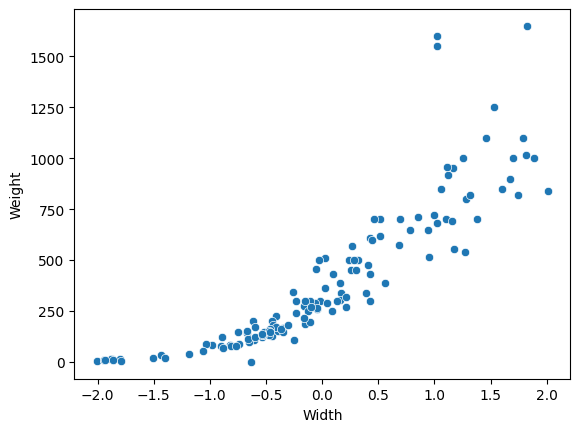

In [192]:
sns.scatterplot(data=x,x =x["Width"], y = y_tr)

In [193]:
x_tr = np.array(x_tr)
y_tr = np.array(y_tr)
y_test = np.array(y_test)
x_tr.shape

(135, 11)

In [194]:
#add ones in x_tr and x_test
ones = np.ones((x_tr.shape[0],1))
x_tr  = np.hstack((ones , x_tr))
ones = np.ones((x_test.shape[0],1))
x_test  = np.hstack((ones , x_test))
print(x_tr[:5,:])

[[ 1.          1.38011947  1.31843452 -0.3957663  -0.05652238  0.
   0.          0.          1.          0.          0.          0.        ]
 [ 1.         -0.57673809 -0.55377311 -0.72904442 -0.47217391  0.
   0.          1.          0.          0.          0.          0.        ]
 [ 1.          0.56727095  0.61635666  1.7013816   0.69712495  1.
   0.          0.          0.          0.          0.          0.        ]
 [ 1.         -1.48993828 -1.53668212 -1.58367812 -1.94531196  0.
   0.          0.          0.          0.          1.          0.        ]
 [ 1.          1.70124481  1.64607086 -0.27593596  0.26927463  0.
   0.          0.          1.          0.          0.          0.        ]]


In [195]:
def hypothesis(x, theta):
  return np.dot(x,theta)

In [196]:
def gradient(x,y,theta):
  m,n = x.shape
  grad = np.zeros(n)
  y_p = hypothesis(x,theta)
  grad += np.dot(x.T, (y_p - y))
  return grad/m

In [197]:
def cost(x,y,theta):
  total_error = 0
  m = x.shape[0]
  for i in range(m):
    y_p = hypothesis(x[i], theta)
    total_error += (y_p - y[i])**2
  return total_error/m

In [198]:
def gradient_descent(x,y,learning_rate = 0.03):
  theta = np.zeros(x.shape[1],)
  cost_epoch =[]
  max_steps = 500

  for i in range(max_steps):
    grad = gradient(x,y,theta)

    e = cost(x,y,theta)
    cost_epoch.append(e)

    theta -= learning_rate*grad
  return theta, cost_epoch

In [199]:
theta, cost_epoch = gradient_descent(x_tr,y_tr)
theta

array([345.60597425, 134.6451947 , 130.62801368,  44.04504395,
        78.80936202,  44.75977069,  31.08542665,  47.5946689 ,
       -18.50478083,   1.74976995, 198.53038036,  40.39073853])

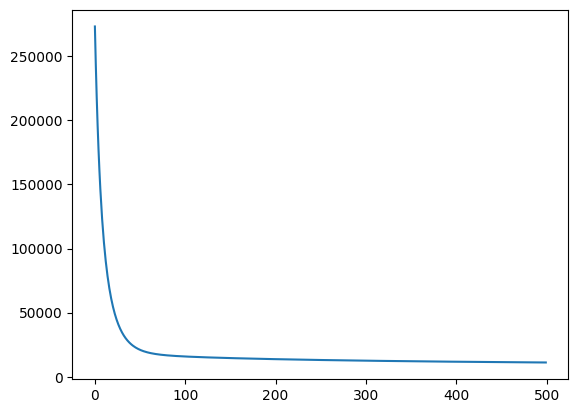

In [208]:
plt.plot(cost_epoch)
plt.show()

In [209]:

y_p = hypothesis(x_test,theta)
print(y_p,)

[ 645.35608247  130.3535242   597.97819885  -94.72230617  731.23381642
  991.58090777  827.73536114  713.7976282    82.0386475   903.82900814
  -95.23773625  698.78694531  848.90671889  127.92787496  -21.96266404
  978.29963388   73.17263221 -158.57344657  870.60975361  -83.21439822
  798.76819266  -65.98559617  507.61011336  201.36867852]


In [210]:
print(y_test)

[ 685.   110.   600.     9.8  685.   950.   900.   540.   120.   975.
    9.7  725.   770.   140.    69.  1000.   120.    40.   925.    55.
 1000.    60.   500.   200. ]


In [211]:
y_p.shape

(24,)

In [212]:
theta

array([345.60597425, 134.6451947 , 130.62801368,  44.04504395,
        78.80936202,  44.75977069,  31.08542665,  47.5946689 ,
       -18.50478083,   1.74976995, 198.53038036,  40.39073853])

In [213]:
from sklearn.metrics import r2_score

In [214]:
r2_score(y_test,y_p)

0.9390695938239845